# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection using APIs

In [36]:
# Define period 
Start_date='2023-07-27' 
End_date='2024-07-27'

# List of stock tickers to download 
Tickers = ['AC', 'AI', 'MC', 'OR', 'TTE','BN']

# Download stock data using Yahoo Finance API
Data=yf.download(Tickers, start=Start_date, end=End_date, progress=False)

# Show rows
print(Data.head())

Price       Adj Close                                                         \
Ticker             AC         AI         BN         MC         OR        TTE   
Date                                                                           
2023-07-27  36.752476  38.209999  34.536423  45.587109  14.040876  56.344475   
2023-07-28  36.782295  39.759998  34.447128  45.320576  14.248233  57.049141   
2023-07-31  36.832001  42.000000  34.625713  46.481915  14.633319  57.944252   
2023-08-01  36.921474  44.369999  34.119724  46.405758  14.297601  57.468128   
2023-08-02  36.782295  39.869999  33.147423  45.596630  13.843395  55.516022   

Price           Close                                   ...       Open  \
Ticker             AC         AI         BN         MC  ...         BN   
Date                                                    ...              
2023-07-27  36.970001  38.209999  34.810001  47.889999  ...  35.709999   
2023-07-28  37.000000  39.759998  34.720001  47.610001  ...  35

In [7]:
# reset index to bring Date into the columns for the melt function
Data=Data.reset_index()

In [8]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted=Data.melt(id_vars=['Date'], var_name=['Attribute','Ticker'])

In [9]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted=data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

In [10]:
# Reset the index again to turn the multi-index (Date and Ticker) back into columns for easier analysis
stock_data=data_pivoted.reset_index()

In [11]:
# Show rows
print(stock_data.head())

Attribute       Date Ticker  Adj Close      Close       High        Low  \
0         2023-07-27     AC  36.752476  36.970001  37.470001  36.720001   
1         2023-07-27     AI  38.209999  38.209999  43.757999  37.761002   
2         2023-07-27     BN  34.536423  34.810001  35.730000  34.779999   
3         2023-07-27     MC  45.587109  47.889999  50.480000  45.250000   
4         2023-07-27     OR  14.040876  14.220000  14.640000  14.190000   

Attribute       Open      Volume  
0          36.720001      2700.0  
1          42.340000  30001900.0  
2          35.709999   1091200.0  
3          45.980000   1962400.0  
4          14.640000    581100.0  


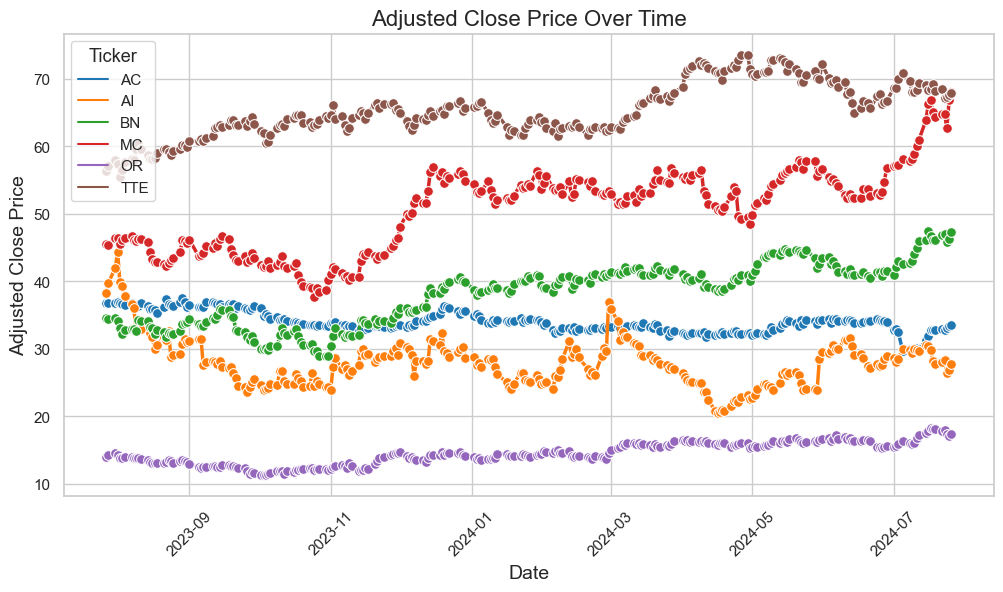

In [13]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot the adjusted close price data
sns.lineplot(
    data=stock_data,
    x='Date',
    y='Adj Close',
    hue='Ticker',
    marker='o',  # Use circular markers to make the data points more visible
    palette='tab10', 
    linewidth=2.5, 
    markersize=7 
)

plt.title("Adjusted Close Price Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.legend(title="Ticker", title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


The graph illustrates the adjusted close prices of six stocks from July 2023 to July 2024. Among these, TTE exhibits the highest adjusted close prices, with MC following closely behind. Both BN and AI demonstrate significant upward trends in their prices. In contrast, AC and OR show more stability with relatively minor price fluctuations, and OR has the lowest adjusted close prices.

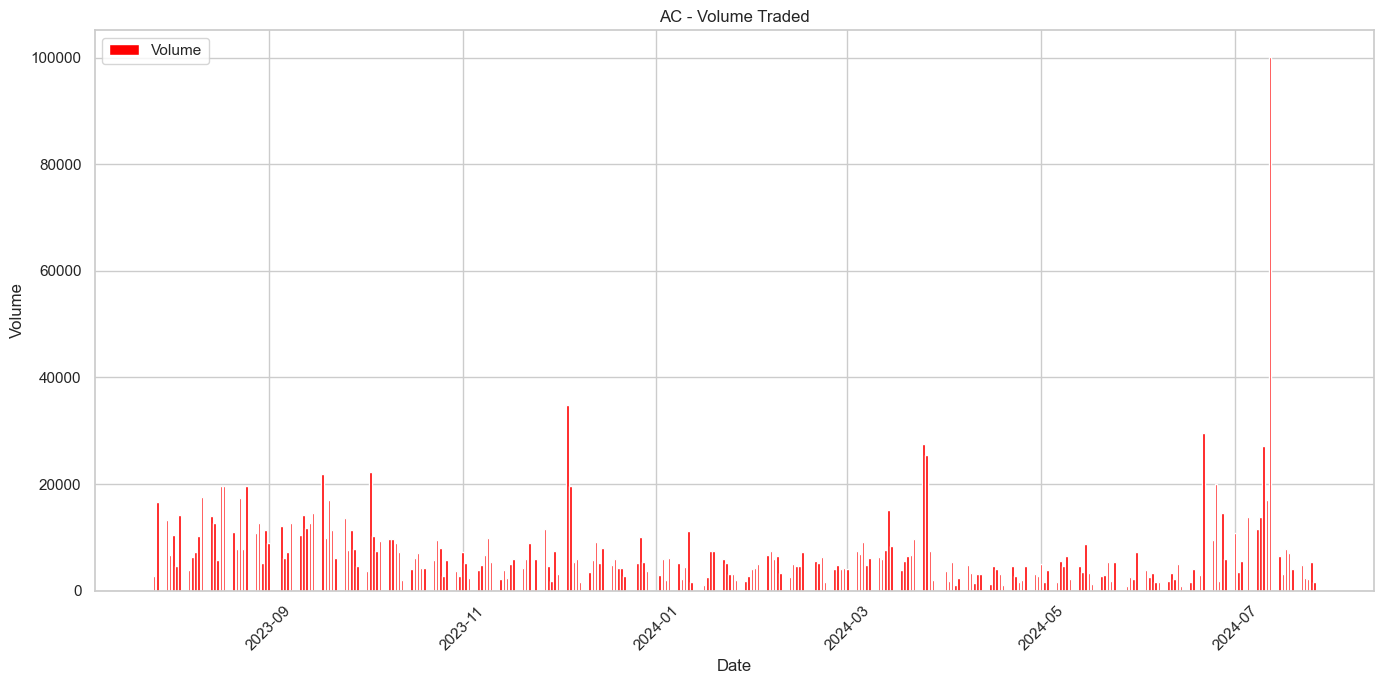

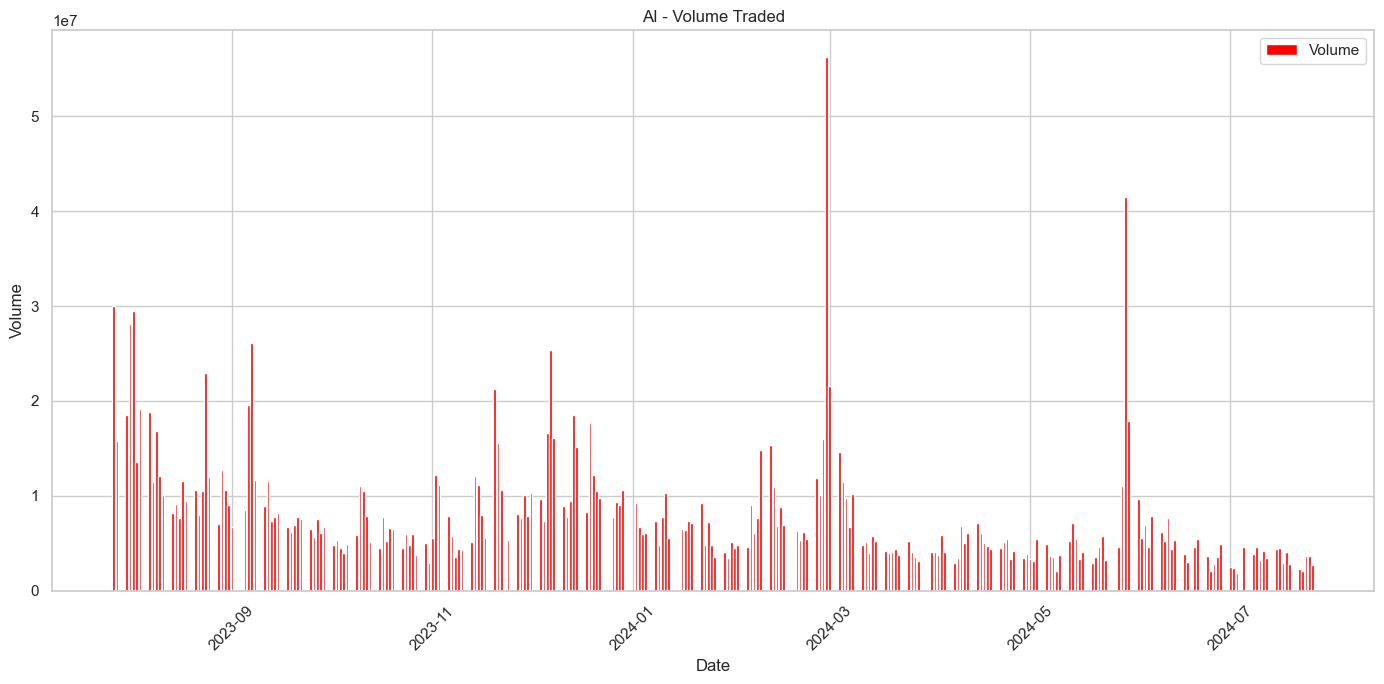

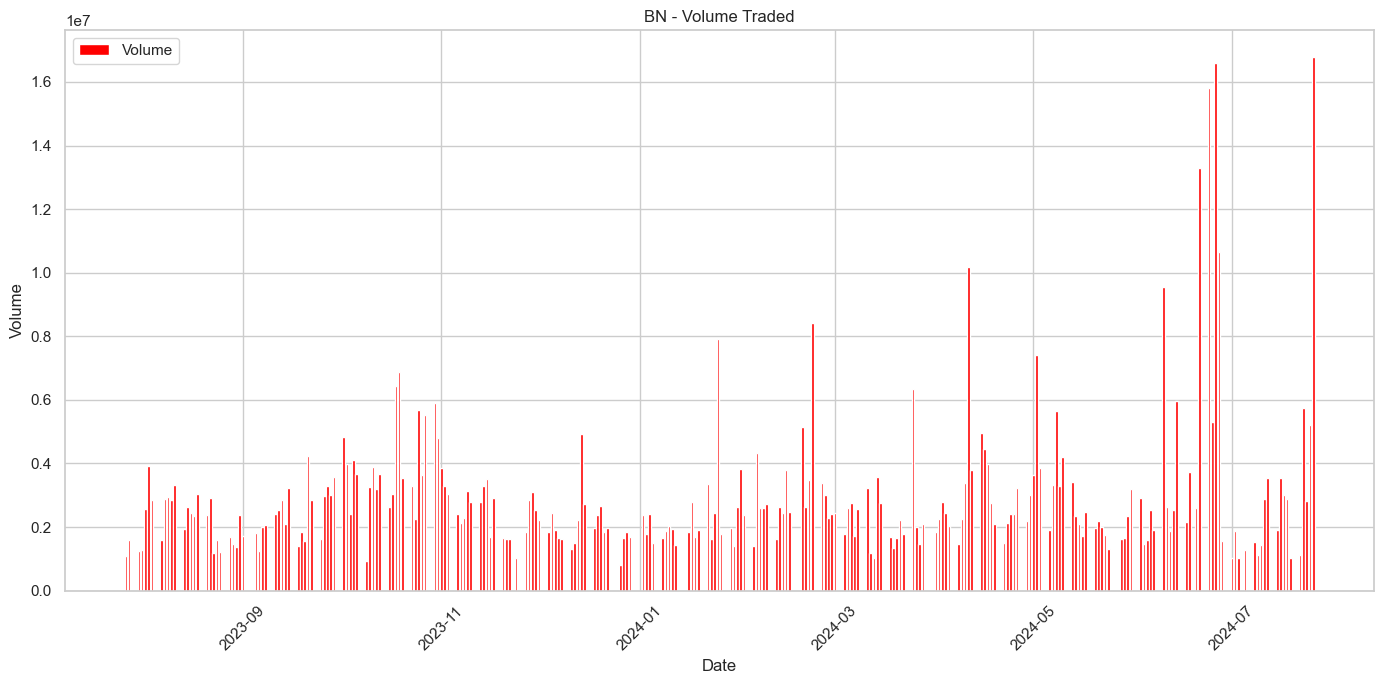

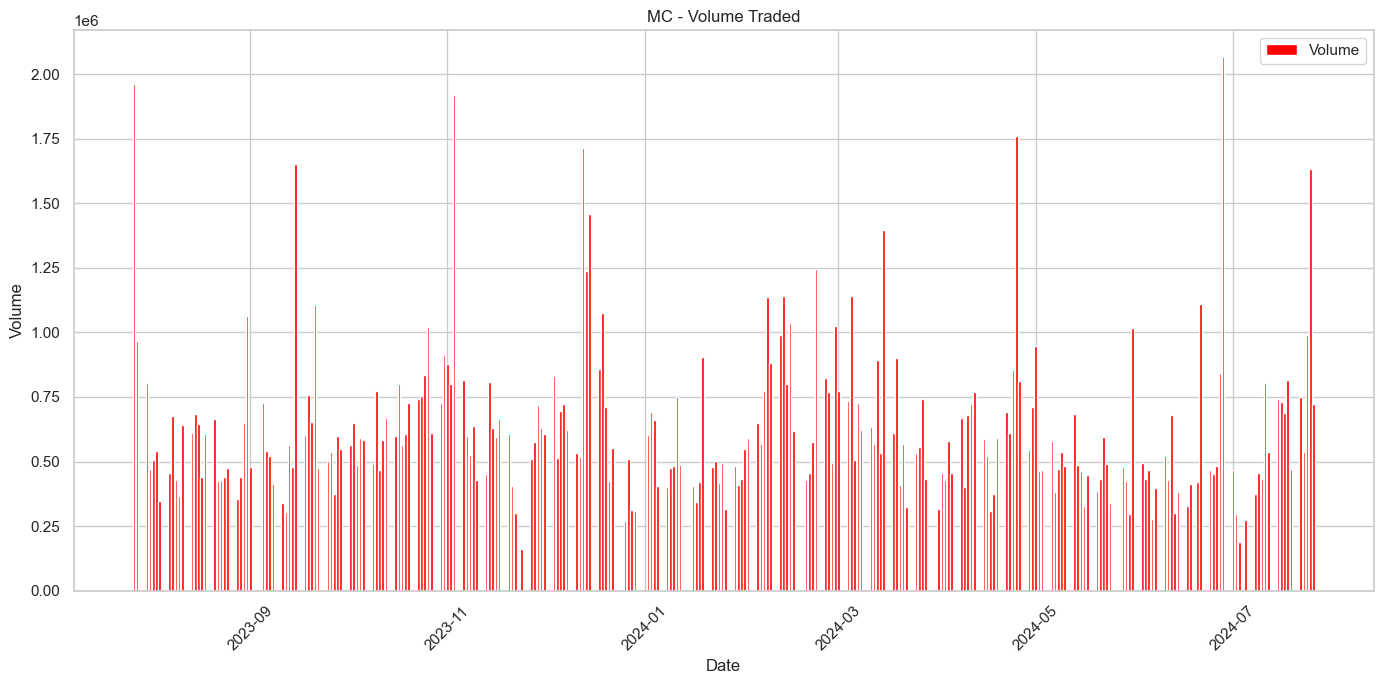

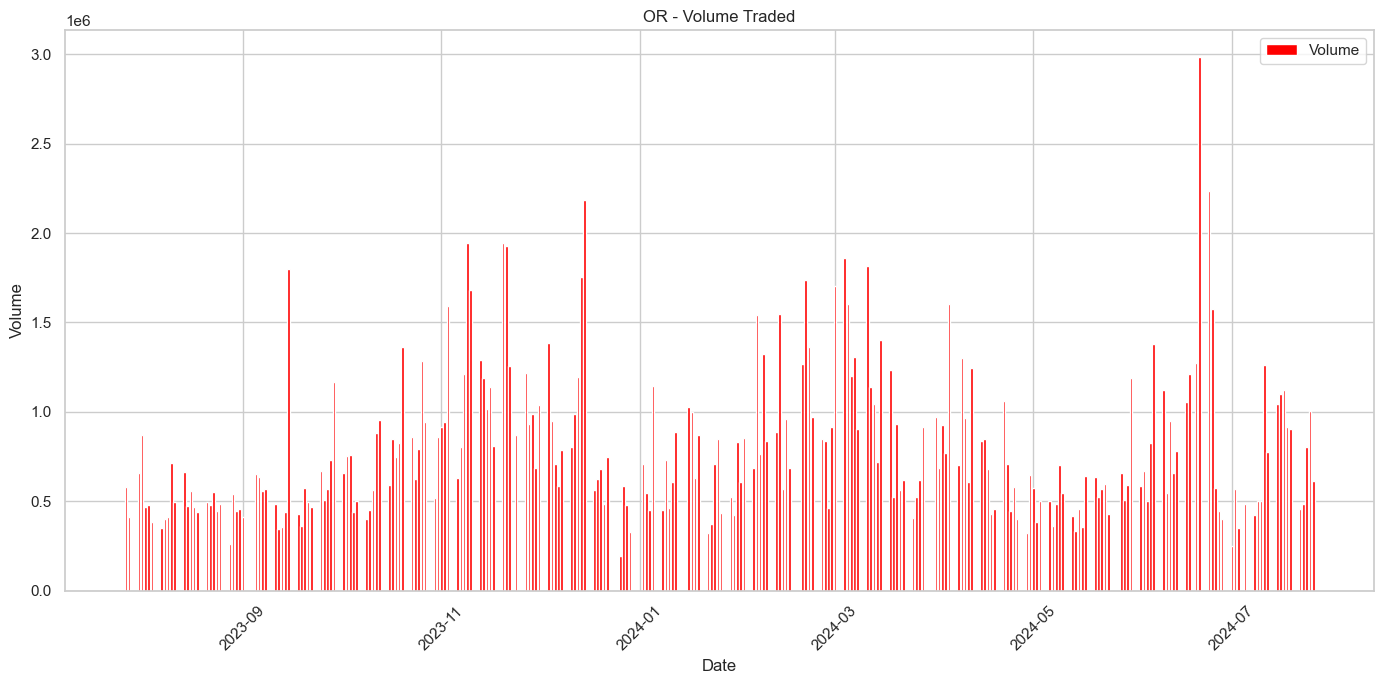

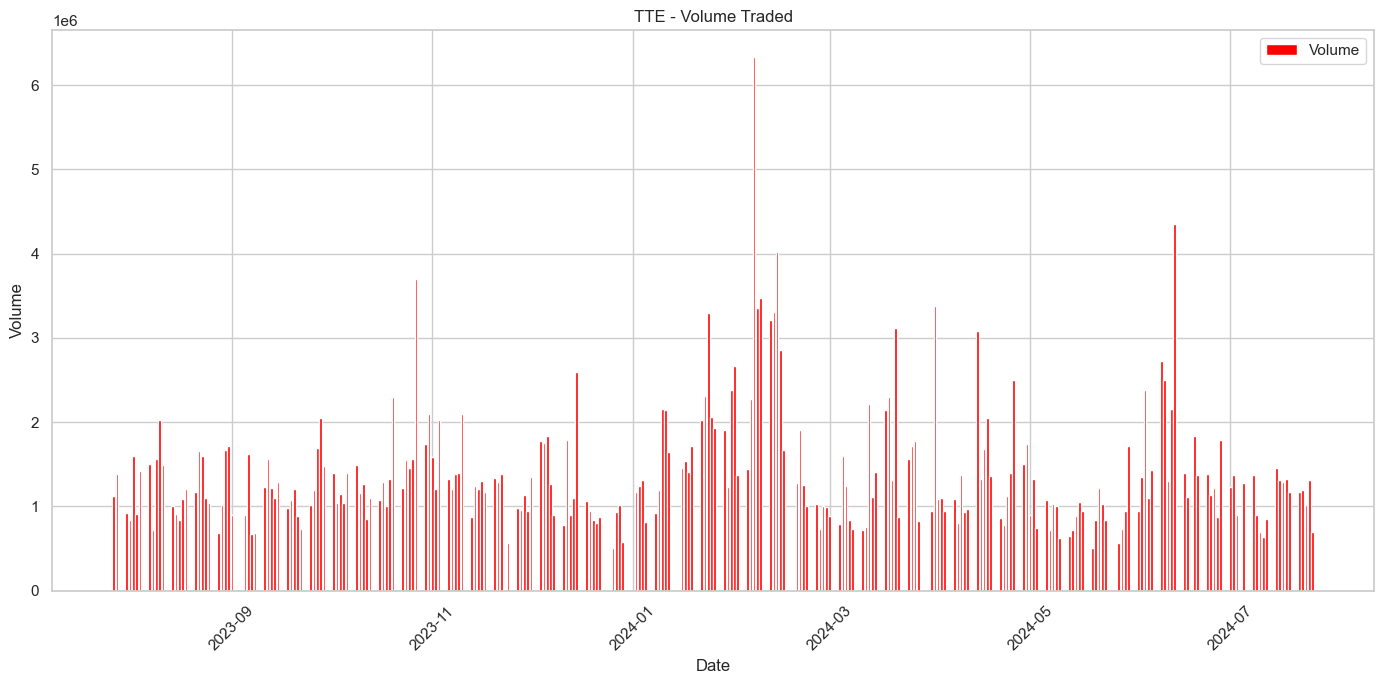

In [18]:
# Visualizing the volume traded of these stocks

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='red')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The volume traded graphs show significant trading activity at various points, with spikes indicating high trading volumes, especially noticeable for MC, OR and BN. These graphs are important for understanding price movements and trading behaviors, aiding in making informed investment decisions.

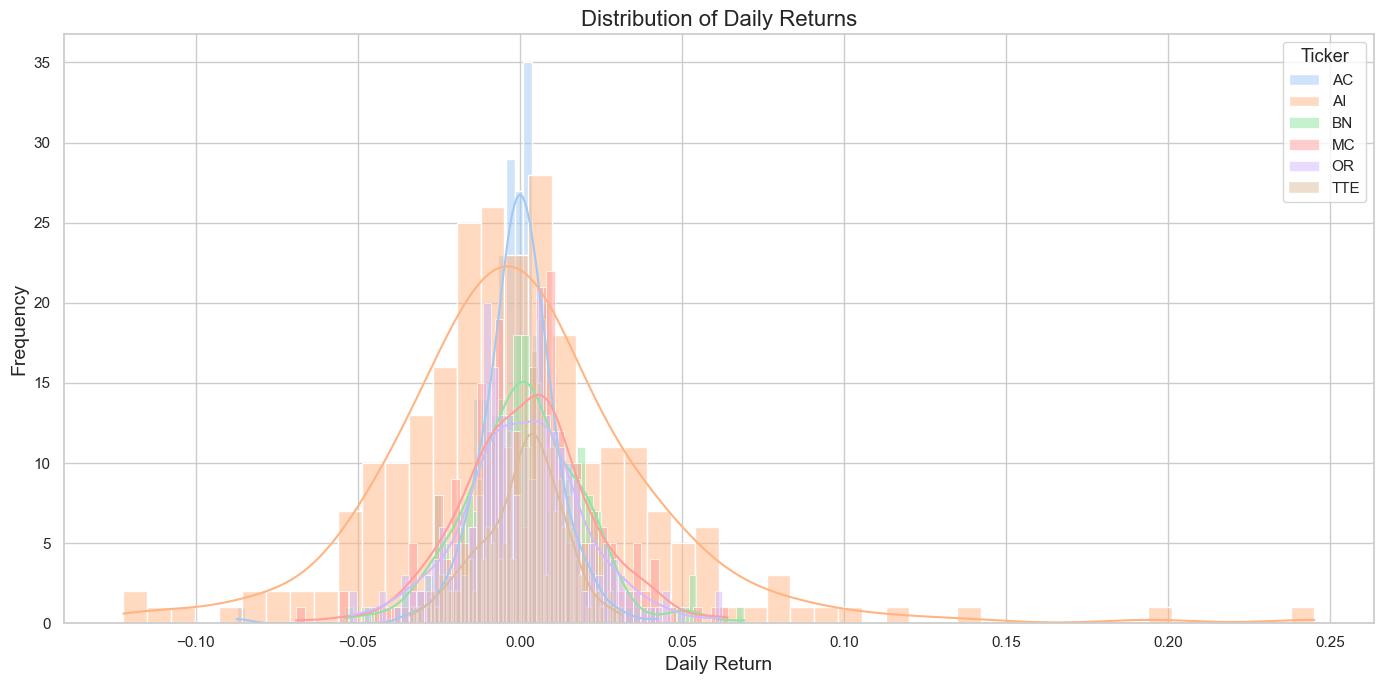

In [20]:
# Visualizing the distribution of daily returns of these stocks

# Calculate daily returns
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

palette = sns.color_palette('pastel', len(unique_tickers))

# Plot the distributions of daily returns
for i, ticker in enumerate(unique_tickers):
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5, color=palette[i])

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


The distributions are approximately normal. AI appears to have slightly wider distributions, suggesting higher volatility compared to other stocks.

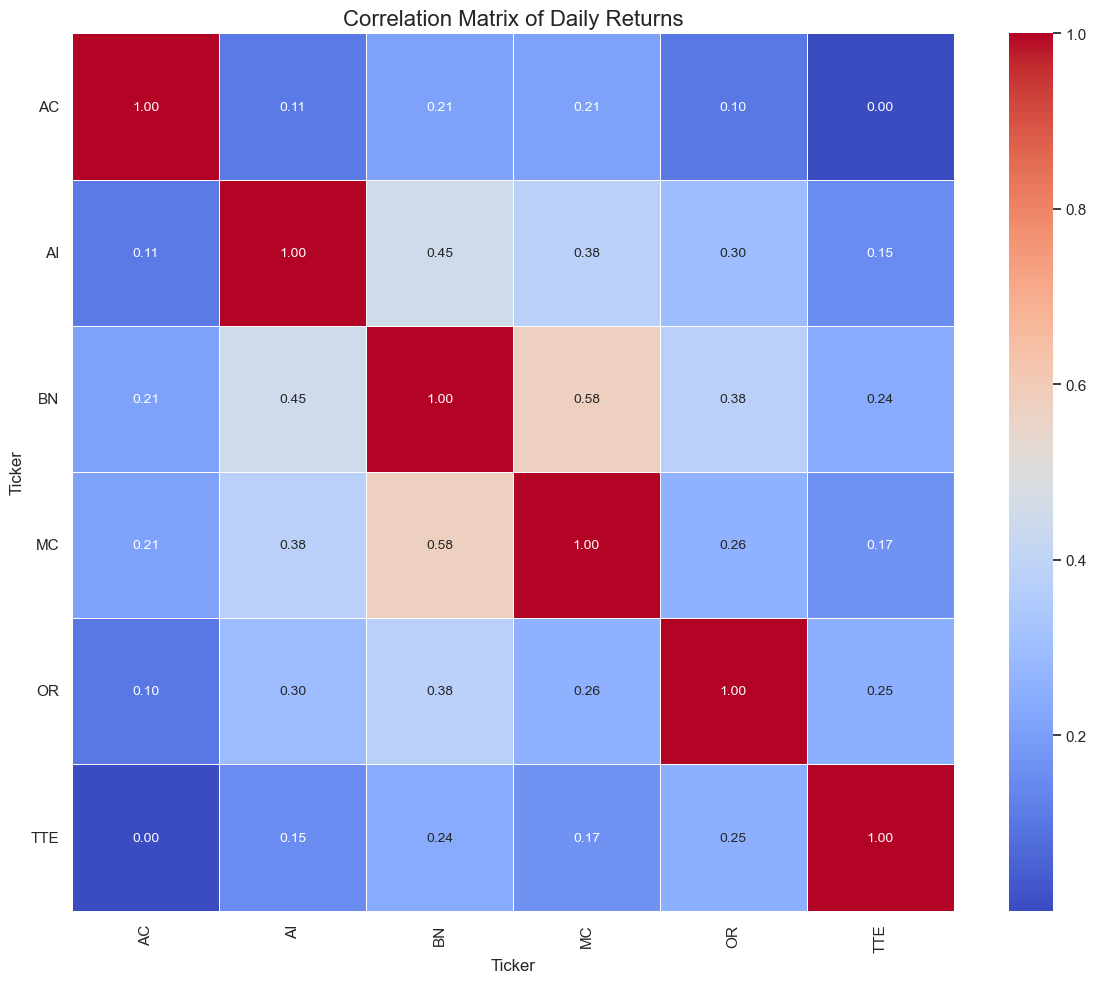

In [21]:
# Correlation between all these stocks

daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

BN and MC have a high positive correlation of 0.58, indicating they often move in the same direction. TTE shows no correlation with AC. AI has a low correlation with TTE (0.15) and AC (0.11). MC also has low correlations with AC (0.21) and TTE (0.17). OR has a low correlation with AC (0.10). These varying correlations suggest potential diversification benefits.
Note : Combining stocks with lower correlations can help reduce overall portfolio risk.

# Portfolio Optimization

In [22]:
# Calculate the expected returns and volatility for each stock

expected_returns = daily_returns.mean() * 366
volatility = daily_returns.std() * np.sqrt(366)

# Create a DataFrame to store the stock statistics
stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

# Show the stock statistics
print(stock_stats)

        Expected Return  Volatility
Ticker                             
AC            -0.107351    0.232783
AI            -0.151573    0.806786
BN             0.515712    0.342054
MC             0.657041    0.379790
OR             0.374150    0.358100
TTE            0.298702    0.235366


- AC and AI have negative expected returns of -10.7% and -15.1%, respectively, indicating they have historically underperformed and might result in losses if past trends persist.
- BN, MC, OR and TTE show positive expected returns, with MC leading at 65.7%, suggesting it has been the top performer among the stocks analyzed.
- AI exhibits the highest volatility at 80.6%, indicating it has experienced the largest price fluctuations and is the riskiest stock.
- AC and TTE have the lowest volatility at 23.28% and 23.54%, respectively, reflecting their relative stability with less price variation.

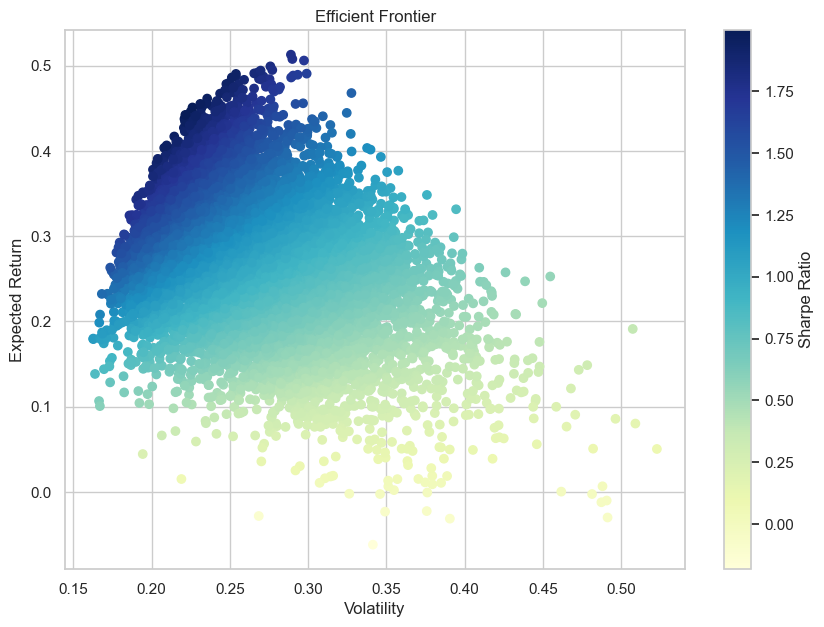

In [37]:
# Generate a series of random portfolios to identify the efficient frontier

# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 366

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [32]:
# Identify the optimal portfolio with the maximum Sharpe ratio

max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx] * 100 # Convert to percentage
max_sharpe_volatility = results[1, max_sharpe_idx] * 100
max_sharpe_ratio = results[2, max_sharpe_idx]

print(f"Expected Return: ~{max_sharpe_return:.2f}%")
print(f"Volatility: ~{max_sharpe_volatility:.2f}%")
print(f"Sharpe Ratio: ~{max_sharpe_ratio:.2f}")

Expected Return: ~44.24%
Volatility: ~22.16%
Sharpe Ratio: ~2.00


In [33]:
# Identify the weights of the stocks in the optimal portfolio with the maximum Sharpe ratio

# Initialize an array to store the weights of the stocks
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    
    weights = np.random.random(len(unique_tickers)) # Generate a random set of weights for the stocks
    weights /= np.sum(weights)  # Normalize the weights


    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df


,Ticker,Weight
0,AC,0.191590
1,AI,0.035331
2,BN,0.105846
3,MC,0.227529
4,OR,0.273320
5,TTE,0.166384


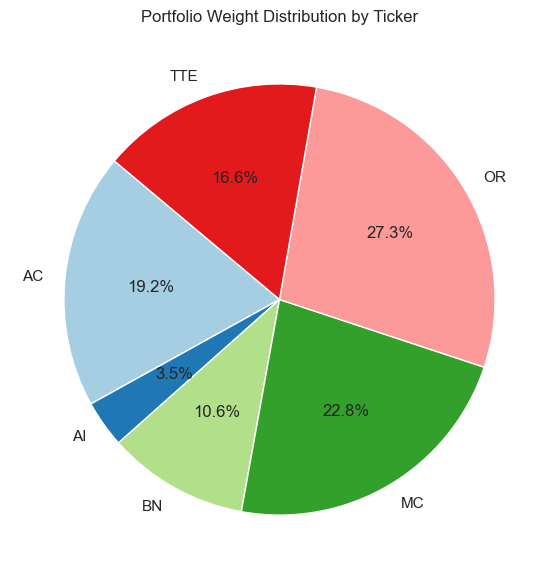

In [38]:
# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(portfolio_weights_df['Weight']*100, labels=portfolio_weights_df['Ticker'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(unique_tickers))), startangle=140)
plt.title('Portfolio Weight Distribution by Ticker')
plt.show()

OR has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while AI has the smallest allocation. This strategic distribution is designed to optimize returns while managing risk, by taking advantage of each stock's performance and their correlations.